In [1]:
# https://programminghistorian.org/en/lessons/exploring-and-analyzing-network-data-with-python

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from networkx.algorithms import community
import seaborn as sns

In [3]:
df_graph = pd.read_csv('withFollowRetweet.csv')

In [4]:
abuse_nodes = pd.read_csv('abuse_nodes.csv')

abuse_nodes['abuse'] = abuse_nodes['racism'] + abuse_nodes['sexism']

In [5]:
abuse_data = df_graph[df_graph['source'].isin(list(abuse_nodes['user_id'])) & df_graph['target'].isin(list(abuse_nodes['user_id']))]
abuse_data.to_csv('abuse_data.csv',index=False)

In [29]:
print(nx.info(G_abuse))

Name: 
Type: Graph
Number of nodes: 353
Number of edges: 1423
Average degree:   8.0623


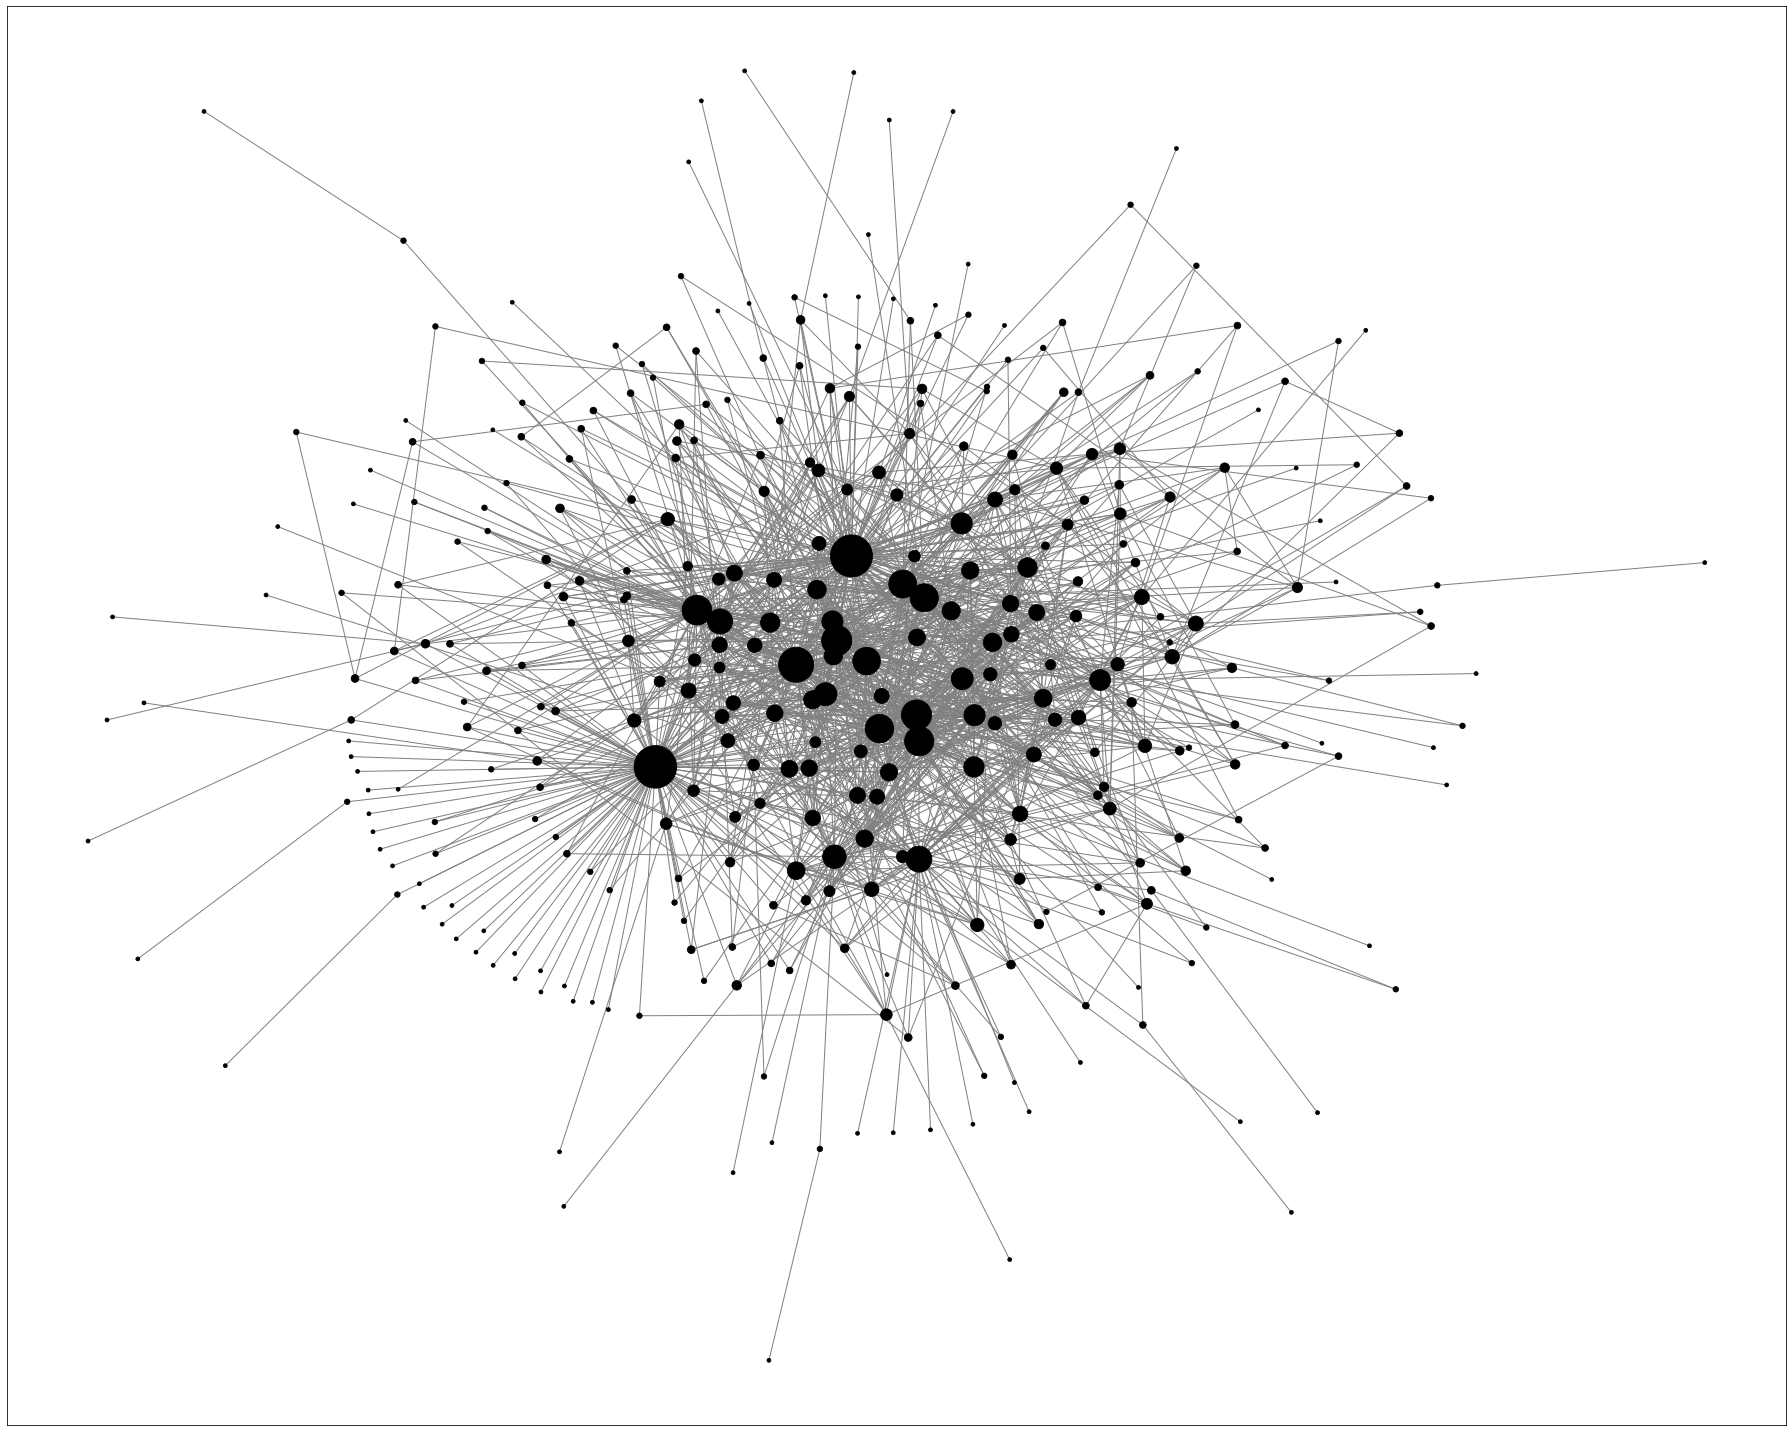

In [6]:
G_abuse = nx.from_pandas_edgelist(abuse_data,source='source',target='target',edge_attr=['weight'])

uncoman = set(abuse_nodes['user_id'].unique()) ^ set(G_abuse.nodes())

for i in uncoman:
    G_abuse.add_node(i)
    
nx.set_node_attributes(G_abuse, pd.Series(abuse_nodes.racism, index=abuse_nodes.user_id).to_dict(), 'racism')
nx.set_node_attributes(G_abuse, pd.Series(abuse_nodes.sexism, index=abuse_nodes.user_id).to_dict(), 'sexism')
nx.set_node_attributes(G_abuse, pd.Series(abuse_nodes.normal, index=abuse_nodes.user_id).to_dict(), 'normal')

G_abuse.remove_nodes_from(list(nx.isolates(G_abuse)))

plt.figure(num=None, figsize=(25, 20), dpi=None)

#layout=nx.spring_layout(G_normal)
layout=nx.nx_pydot.graphviz_layout(G_abuse)

color_map=['black']
node_deg = nx.degree(G_abuse)
nx.draw_networkx(
    G_abuse,
    node_size=[int(deg[1])*15 for deg in node_deg],
    arrowsize=5,
    linewidths=0.8,
    #width = [i['weight']* for i in dict(G.edges).values()],
    pos=layout,
    edge_color='gray',
    edgecolors='black',
    node_color=color_map,
    with_labels=False
    #font_size=35
    )


plt.tight_layout()
plt.savefig("abuse_nw.jpg", format='jpg')

In [30]:
deg=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        deg.append(G_abuse.degree(i))
    else:
        deg.append(0)   
        
abuse_nodes['degree'] = deg

In [31]:
wt_deg=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        wt_deg.append(G_abuse.degree(i,weight='weight'))
    else:
        wt_deg.append(0)   
        
abuse_nodes['weighted_degree'] = wt_deg

In [9]:
closeness_centrality = nx.closeness_centrality(G_abuse)

closeness=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        closeness.append(closeness_centrality[i])
    else:
        closeness.append(0)   
        
abuse_nodes['closeness_centrality'] = closeness

In [10]:
betweenness_centrality = nx.betweenness_centrality(G_abuse)

betweenness=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        betweenness.append(betweenness_centrality[i])
    else:
        betweenness.append(0)   
        
abuse_nodes['betweenness_centrality'] = betweenness

In [11]:
import community

part = community.best_partition(G_abuse)

community_l=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        community_l.append(part[i])
    else:
        community_l.append(0)   
        
abuse_nodes['community'] = community_l

In [12]:
eigenvector_centrality = nx.eigenvector_centrality(G_abuse)

eigenvector=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        eigenvector.append(eigenvector_centrality[i])
    else:
        eigenvector.append(0)   
        
abuse_nodes['eigenvector_centrality'] = eigenvector

In [13]:
hubs, authorities = nx.hits(G_abuse, max_iter = 1000, normalized = True) 

hubs_l=[]
authorities_l = []

for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        hubs_l.append(hubs[i])
        authorities_l.append(authorities[i])
    else:
        hubs_l.append(0)
        authorities_l.append(0)   
        
abuse_nodes['hubs'] = hubs_l
abuse_nodes['authorities'] = authorities_l

In [14]:
# modularity 
    
mod = community.modularity(part,G_abuse)
mod

0.32789019789585705

In [15]:
# connected components

# If your Graph has more than one component, this will return False:
print(nx.is_connected(G_abuse))

# Next, use nx.connected_components to get the list of components,
# then use the max() command to find the largest one:
components = nx.connected_components(G_abuse)
largest_component = max(components, key=len)

# Create a "subgraph" of just the largest component
# Then calculate the diameter of the subgraph, just like you did with density.
#

subgraph = G_abuse.subgraph(largest_component)
diameter = nx.diameter(subgraph)
radius = nx.radius(subgraph)
avg_path = nx.average_shortest_path_length(subgraph)

print("Network diameter of largest component:", diameter)
print("Network radius of largest component:", radius)
print("Network average shortest path length of largest component:", avg_path)


print("Components:")
[len(c) for c in sorted(nx.connected_components(G_abuse), key=len, reverse=True)]

True
Network diameter of largest component: 6
Network radius of largest component: 4
Network average shortest path length of largest component: 2.775093355652846
Components:


[353]

In [16]:
# No. triangles
number_of_triangles = sum(nx.triangles(G_abuse).values()) / 3

print("number of triangles:", number_of_triangles)

number of triangles: 2399.0


In [17]:
# density

density = nx.density(G_abuse)
print("Network density:", density)

Network density: 0.022904326551635334


In [18]:
# triadic closure

triadic_closure = nx.transitivity(G_abuse)
print("Triadic closure:", triadic_closure)

Triadic closure: 0.16304569447905576


In [19]:
# https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.cluster.clustering.html4

clustering = nx.clustering(G_abuse)

clustering_l=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        clustering_l.append(clustering[i])
    else:
        clustering_l.append(0)   
        
abuse_nodes['clustering'] = clustering_l

In [20]:
pr = nx.pagerank(G_abuse, alpha=0.9)

pr_l=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        pr_l.append(pr[i])
    else:
        pr_l.append(0)   
        
abuse_nodes['pageRank'] = pr_l

In [21]:
triangles = nx.triangles(G_abuse)

triangles_l=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        triangles_l.append(triangles[i])
    else:
        triangles_l.append(0)   
        
abuse_nodes['triangles'] = triangles_l

In [22]:
from networkx.algorithms import community
communities = community.greedy_modularity_communities(G_abuse)

modularity_dict = {} # Create a blank dictionary
for i,c in enumerate(communities): # Loop through the list of communities, keeping track of the number for the community
    for name in c: # Loop through each person in a community
        modularity_dict[name] = i # Create an entry in the dictionary for the person, where the value is which group they belong to.

In [23]:
modularity_l=[]
for i in abuse_nodes['user_id']:
    if i in G_abuse.nodes():
        modularity_l.append(modularity_dict[i])
    else:
        modularity_l.append(0)   
        
abuse_nodes['greedy_modularity_communities'] = modularity_l

In [24]:
abuse_nodes

,racism,sexism,normal,user_id,abuse,degree,weighted_degree,closeness_centrality,betweenness_centrality,community,eigenvector_centrality,hubs,authorities,clustering,pageRank,triangles,greedy_modularity_communities
0,0.0,0.000636,0.002418,2105021,0.000636,35,33.008086,0.469960,0.010696,1,0.143403,1.280565e-02,1.280565e-02,0.265546,0.011378,158,1
1,0.0,0.000127,0.000000,7177992,0.000127,1,1.000000,0.307962,0.000000,5,0.003409,3.376098e-04,3.376098e-04,0.000000,0.000605,0,4
2,0.0,0.000127,0.000127,9444712,0.000127,2,2.000000,0.362887,0.000000,4,0.013102,1.158343e-03,1.158343e-03,1.000000,0.001000,1,5
3,0.0,0.000127,0.000000,10235202,0.000127,0,0.000000,0.000000,0.000000,0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0,0
4,0.0,0.000254,0.000891,12385682,0.000254,1,1.000000,0.316547,0.000000,9,0.004408,4.424293e-04,4.424293e-04,0.000000,0.000644,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.0,0.000127,0.000254,3038926481,0.000127,0,0.000000,0.000000,0.000000,0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0,0
470,0.0,0.000127,0.000000,3056089651,0.000127,1,1.000000,0.359551,0.000000,8,0.009944,9.161346e-04,9.161346e-04,0.000000,0.000673,0,0
471,0.0,0.000127,0.000127,3063697555,0.000127,6,6.000000,0.393736,0.000327,2,0.039751,3.755115e-03,3.755115e-03,0.666667,0.002237,10,1
472,0.0,0.000127,0.000763,3063966541,0.000127,3,3.000000,0.391546,0.000000,4,0.026932,2.524632e-03,2.524632e-03,1.000000,0.001299,3,5


In [25]:
cliques = nx.find_cliques(G_abuse)

In [26]:
cliques4 = [clq for clq in cliques if len(clq) >= 1]

In [27]:
cliques4

[[29406736, 2360323201, 2587278392, 1955720384, 340376505, 359236505],
 [29406736, 2360323201, 2587278392, 187138183],
 [29406736, 2360323201, 20644420, 340376505, 359236505, 1955720384],
 [29406736, 2360323201, 20644420, 340376505, 359236505, 2831363550],
 [29406736, 2360323201, 20644420, 340376505, 169833243],
 [29406736, 2360323201, 20644420, 187138183],
 [29406736, 201303134, 20644420],
 [29406736, 1248431851],
 [29406736, 1386366252],
 [29406736, 144051948],
 [29406736, 26403375],
 [29406736, 53645593],
 [29406736, 13857342, 1955720384, 359236505],
 [29406736, 13857342, 169833243],
 [261162002, 907734912],
 [261162002, 2309562402],
 [261162002, 24669894],
 [261162002, 3023378215],
 [261162002, 930620467],
 [261162002, 2756873076],
 [261162002, 342065781],
 [261162002, 22874109],
 [261162002, 13857342],
 [62208019, 2650794800],
 [62208019, 2360323201, 590023803, 138294089],
 [62208019, 2360323201, 590023803, 20644420, 187138183],
 [62208019, 2360323201, 25805982],
 [62208019, 54664

In [28]:
abuse_nodes.to_csv("abuse_graph_data.csv",index=False)

In [32]:
abuse_nodes

,racism,sexism,normal,user_id,abuse,degree,weighted_degree,closeness_centrality,betweenness_centrality,community,eigenvector_centrality,hubs,authorities,clustering,pageRank,triangles,greedy_modularity_communities
0,0.0,0.000636,0.002418,2105021,0.000636,35,33.008086,0.469960,0.010696,1,0.143403,1.280565e-02,1.280565e-02,0.265546,0.011378,158,1
1,0.0,0.000127,0.000000,7177992,0.000127,1,1.000000,0.307962,0.000000,5,0.003409,3.376098e-04,3.376098e-04,0.000000,0.000605,0,4
2,0.0,0.000127,0.000127,9444712,0.000127,2,2.000000,0.362887,0.000000,4,0.013102,1.158343e-03,1.158343e-03,1.000000,0.001000,1,5
3,0.0,0.000127,0.000000,10235202,0.000127,0,0.000000,0.000000,0.000000,0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0,0
4,0.0,0.000254,0.000891,12385682,0.000254,1,1.000000,0.316547,0.000000,9,0.004408,4.424293e-04,4.424293e-04,0.000000,0.000644,0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
469,0.0,0.000127,0.000254,3038926481,0.000127,0,0.000000,0.000000,0.000000,0,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0,0
470,0.0,0.000127,0.000000,3056089651,0.000127,1,1.000000,0.359551,0.000000,8,0.009944,9.161346e-04,9.161346e-04,0.000000,0.000673,0,0
471,0.0,0.000127,0.000127,3063697555,0.000127,6,6.000000,0.393736,0.000327,2,0.039751,3.755115e-03,3.755115e-03,0.666667,0.002237,10,1
472,0.0,0.000127,0.000763,3063966541,0.000127,3,3.000000,0.391546,0.000000,4,0.026932,2.524632e-03,2.524632e-03,1.000000,0.001299,3,5
